# 😸 K-Means

1. Librerías y dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('C:/Users/giuli/OneDrive/.repositorios/machine-learning-level-up/clase09/Datasets/Mall_Customers.csv',  sep =',')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


2. Elijo los datos a usar

In [6]:
x = dataset.iloc[:, [3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

3. **Elbow Method**: Método para determinar el número óptimo de clústeres 𝑘
  * **wcss (Within-Cluster Sum of Squares)**: Suma de las distancias cuadradas de los puntos a sus centroides. Este valor se utiliza para evaluar la compactación de los clústeres.
  * **kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)**: Inicializa el modelo K-means con 𝑖 clústeres.
  * **kmeans.fit(x)**: Ajusta el modelo K-means a los datos.
  * **wcss.append(kmeans.inertia_)**: Guarda el valor de WCSS para cada número de clústeres.

In [7]:
from sklearn.cluster import KMeans

wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

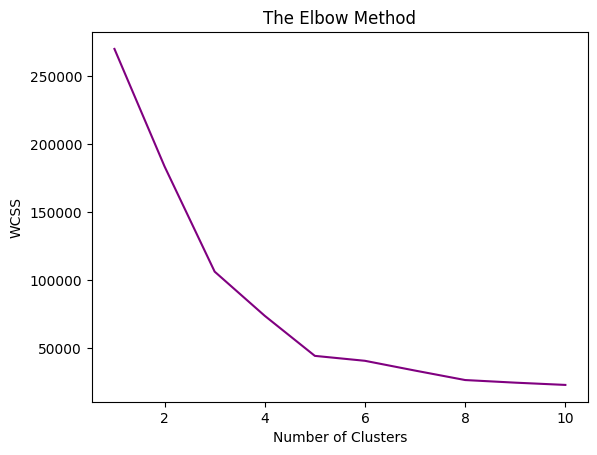

In [12]:
plt.plot(range(1, 11), wcss, color = 'purple')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show

 4. Aplicación del modelo
 
    Inicialización y Ajuste:
    * **kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state=42)**: Inicializa el modelo K-means con 5 clústeres (número óptimo determinado por el método del codo).
    * **clusterizacion = kmeans.fit_predict(x)**: Ajusta el modelo a los datos y predice las etiquetas de los clústeres.

In [13]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state=42)
clusterizacion = kmeans.fit_predict(x)

5. Visualización

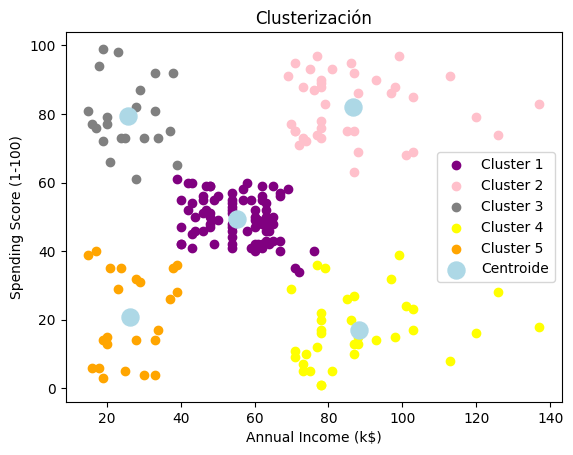

In [18]:
plt.scatter(x[clusterizacion == 0, 0], x[clusterizacion == 0, 1], c='purple', label = 'Cluster 1')
plt.scatter(x[clusterizacion == 1, 0], x[clusterizacion == 1, 1], c='pink', label = 'Cluster 2')
plt.scatter(x[clusterizacion == 2, 0], x[clusterizacion == 2, 1], c='grey', label = 'Cluster 3')
plt.scatter(x[clusterizacion == 3, 0], x[clusterizacion == 3, 1], c='yellow', label = 'Cluster 4')
plt.scatter(x[clusterizacion == 4, 0], x[clusterizacion == 4, 1], c='orange', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='lightblue', s = 150, label = 'Centroide')

plt.title('Clusterización')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()